In [39]:
#import the dependencies:
import numpy as np
import pandas as pd

In [40]:
#load the dataset:
df = pd.read_csv('placement.csv')

In [44]:
#first 5 rows of the dataset:
df.head(10)

,roll_no,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
5,5,7.1,48.0,1
6,6,5.7,NaN,0
7,7,5.0,63.0,0
8,8,6.1,156.0,0
9,9,5.1,66.0,0


In [42]:
#get information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll_no    100 non-null    int64  
 1   cgpa       96 non-null     float64
 2   iq         94 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [43]:
#number of rows & columns:
df.shape

(100, 4)

In [45]:
#is there's any missing values in any rows?:
df.isna().sum()

roll_no      0
cgpa         4
iq           6
placement    0
dtype: int64

In [46]:
#statistical summary:
df.describe()

,roll_no,cgpa,iq,placement
count,100.000000,96.000000,94.000000,100.000000
mean,49.500000,5.954167,122.489362,0.500000
std,29.011492,1.149546,40.010145,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.000000,97.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.825000,148.250000,1.000000
max,99.000000,8.500000,233.000000,1.000000


***Steps:***
* *Preprocess + EDA + Feature Selection*
* *Extract input and output cols*
* *Train test split*
* *Scale the values*
* *Train the model*
* *Evaluate the model/model selection*
* *Deploy the model*

In [47]:
#removing the least contibuting features(column):
df = df.drop('roll_no', axis=1)

In [48]:
#reality-check:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [51]:
#filling the missing values through mean/medium/mode
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())

df['iq']   = df['iq'].fillna(df['iq'].mean())

In [52]:
#reality-check:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [53]:
#import the visualization dependency:
import matplotlib.pyplot as plt

In [54]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


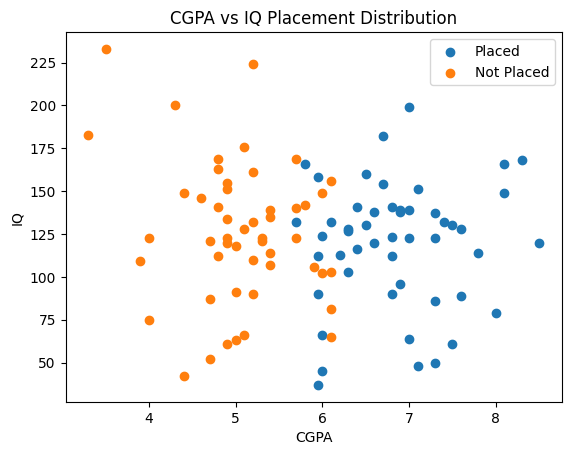

In [56]:
#visualize your data's behavious through plotting the data-points:

placed = df[df['placement'] == 1]
not_placed = df[df['placement'] == 0]

plt.scatter(placed['cgpa'], placed['iq'], label="Placed")
plt.scatter(not_placed['cgpa'], not_placed['iq'], label="Not Placed")

plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA vs IQ Placement Distribution")
plt.legend()

plt.show()

***splitting our dataset in `Features` & `Labels`:***

In [57]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [58]:
#Faetures
X = df.drop('placement', axis=1)

In [59]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [60]:
#Labels
y = df['placement']

In [61]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [63]:
#splitting our data in train & test sets:


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [64]:
X_train

,cgpa,iq
18,4.0,122.489362
30,7.6,128.000000
73,4.9,61.000000
33,6.0,149.000000
90,7.3,86.000000
...,...,...
60,6.9,139.000000
71,6.1,132.000000
14,6.1,103.000000
92,5.2,110.000000


In [67]:
X.shape

(100, 2)

In [66]:
X_train.shape

(90, 2)

In [70]:
y_train.shape

(90,)

In [68]:
y_train

18    0
30    1
73    0
33    0
90    1
     ..
60    1
71    1
14    0
92    0
51    0
Name: placement, Length: 90, dtype: int64

In [71]:
X_test

,cgpa,iq
83,7.5,130.000000
53,8.3,168.000000
70,6.3,127.000000
45,6.0,66.000000
44,7.5,61.000000
39,4.6,146.000000
22,4.9,120.000000
80,4.9,122.489362
10,6.0,45.000000
0,6.8,123.000000


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [75]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [74]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.954167,122.489362,0.500000
std,1.126083,38.778768,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,102.750000,0.000000
50%,5.977083,122.744681,0.500000
75%,6.800000,143.000000,1.000000
max,8.500000,233.000000,1.000000


***StandardScaler formula:***

> ***z = (x−μ) / σ***	​

*where:*
<br>***x** = original feature value*
<br>***μ** = mean of that feature (computed from training data)*
<br>***σ** = standard deviation of that feature*

***z** = scaled (standardized) value*

In [76]:
X_train

,cgpa,iq
18,4.0,122.489362
30,7.6,128.000000
73,4.9,61.000000
33,6.0,149.000000
90,7.3,86.000000
...,...,...
60,6.9,139.000000
71,6.1,132.000000
14,6.1,103.000000
92,5.2,110.000000


In [77]:
#scale the values
X_train = scaler.fit_transform(X_train) #learning with implemention

In [78]:
X_train

array([[-1.7329521 , -0.03363989],
       [ 1.5197841 ,  0.10968781],
       [-0.91976805, -1.63293359],
       [ 0.07412357,  0.65588258],
       [ 1.24872275, -0.98270172],
       [-0.106584  ,  0.47381766],
       [-0.91976805,  0.81193823],
       [ 1.24872275, -1.91903561],
       [-0.46799913,  0.39578983],
       [-1.82330588, -0.3844884 ],
       [ 1.70049167, -0.25444203],
       [-1.37153697,  0.65588258],
       [ 0.9776614 ,  1.95634631],
       [ 1.5197841 , -0.9046739 ],
       [ 2.33296815, -0.09838638],
       [-0.73906048,  1.35813299],
       [-0.91976805,  0.26574346],
       [-1.37153697, -2.1271098 ],
       [-0.73906048, -1.50288721],
       [ 1.24872275, -0.03363989],
       [ 0.88730762,  0.36978056],
       [-0.6487067 ,  0.96799388],
       [-0.106584  ,  1.09804025],
       [-0.6487067 , -0.87866462],
       [ 0.79695383, -0.30646058],
       [ 1.06801518, -1.97105416],
       [ 0.88730762, -0.72260897],
       [ 1.97155302,  1.09804025],
       [ 0.79695383,

>*implementation on **`X_test(training data)`** through the learning from **`X_train (training data)`***

In [79]:
X_test = scaler.transform(X_test)

In [80]:
X_test

array([[ 1.42943032,  0.16170636],
       [ 2.15226058,  1.1500588 ],
       [ 0.34518492,  0.08367854],
       [ 0.07412357, -1.50288721],
       [ 1.42943032, -1.63293359],
       [-1.1908294 ,  0.57785476],
       [-0.91976805, -0.09838638],
       [-0.91976805, -0.03363989],
       [ 0.07412357, -2.04908198],
       [ 0.79695383, -0.02035856]])

***MODEL MODEL model!!***

In [81]:
#load the model:
from sklearn.linear_model import LogisticRegression

In [82]:
clf = LogisticRegression()

In [83]:
#model training:
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [84]:
y_pred = clf.predict(X_test)

In [85]:
#Predicted results:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [86]:
#Origional results:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
Name: placement, dtype: int64

***hmn wbt accuracy?:***

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
#correlation bw test & predicted
accuracy_score(y_test, y_pred)

0.8

***let's visualize our model's result:***

In [89]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

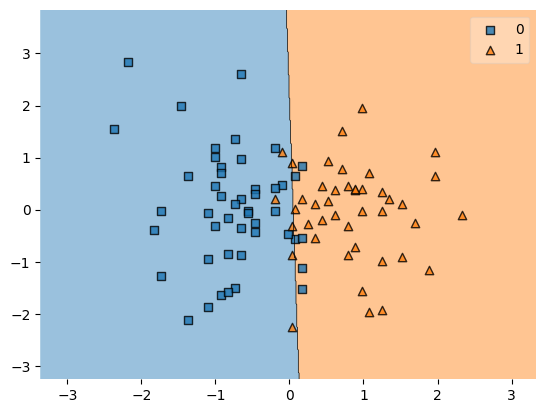

In [90]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=True)

***w-wait let's save our model for the sake of deployment***

In [91]:
import pickle

In [92]:
pickle.dump(clf,open('model.pkl','wb'))